## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

## 라이브러리 로드

In [1]:
# pandas, numpy, matplotlib.pyplot 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 시각화 기본 명칭 확인하기
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

## 시각화 한글폰트 설정하기

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
# 일부 스타일은 폰트 설정을 초기화 하기 때문에 style 설정 시 
# 폰트 설정이 초기화 되지 않도록 폰트 설정 위에 지정해 주세요.
plt.style.use("fivethirtyeight")

In [4]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
plt.rc("font", family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

<AxesSubplot:title={'center':'한글'}>

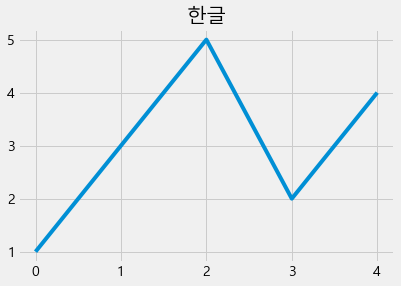

In [5]:
# 그래프 그려보기
pd.Series([1,3,5,2,4]).plot(title="한글")

## 파일 불러오기

In [6]:
# seoul-covid19-2021-01-03.csv 불러오기
# df_01 변수에 담아 재사용합니다.
df_01=pd.read_csv("seoul-covid19-2021-01-03.csv")

## head, tail, sample 로 일부 데이터만 보기

In [7]:
df_01.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [8]:
# seoul-covid19-2021-06-14.csv 불러오기
# df_02 변수에 담아 재사용합니다.
df_02=pd.read_csv("seoul-covid19-2021-06-14.csv")

In [9]:
# 일부데이터만 가져와보기
df_02.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
26727,20005,63568,2021-01-03,마포구,-,기타 확진자 접촉,퇴원
26728,20004,63560,2021-01-03,타시도,-,타시도 확진자 접촉,퇴원
26729,20003,63545,2021-01-03,중구,-,감염경로 조사중,퇴원
26730,20002,63500,2021-01-03,구로구,-,감염경로 조사중,사망
26731,20001,63375,2021-01-03,타시도,-,감염경로 조사중,퇴원


## concat 으로 여러 개의 데이터프레임 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [10]:
# pd.concat 으로 [df_01, df_02] 합치고 df 변수에 할당하기
df=pd.concat([df_01,df_02])
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...,...
26727,20005,63568,2021-01-03,마포구,-,기타 확진자 접촉,퇴원
26728,20004,63560,2021-01-03,타시도,-,타시도 확진자 접촉,퇴원
26729,20003,63545,2021-01-03,중구,-,감염경로 조사중,퇴원
26730,20002,63500,2021-01-03,구로구,-,감염경로 조사중,사망


## 합친 데이터 확인하기

In [11]:
# head, tail, sample 을 통해 데이터 확인하기
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [12]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
26727,20005,63568,2021-01-03,마포구,-,기타 확진자 접촉,퇴원
26728,20004,63560,2021-01-03,타시도,-,타시도 확진자 접촉,퇴원
26729,20003,63545,2021-01-03,중구,-,감염경로 조사중,퇴원
26730,20002,63500,2021-01-03,구로구,-,감염경로 조사중,사망
26731,20001,63375,2021-01-03,타시도,-,감염경로 조사중,퇴원


## 인덱스 값 설정하기
* 전체 데이터프레임의 행의 갯수와 "연번"의 유일값을 확인하면 중복값이 없는 것으로 확인할 수 있습니다.
* shape와 nunique()로 행의 수와 유일값이 일치하는지 확인합니다.

In [13]:
# shape
df.shape

(46732, 7)

In [14]:
# 연번의 nunique()
df["연번"].nunique()

46732

In [15]:
# set_index 를 통해 인덱스 값을 변경합니다.
df=df.set_index("연번")
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


## 연번 순으로 정렬하기

In [16]:
# sort_index 를 통해 인덱스값 기준으로 정렬합니다.
df=df.sort_index(ascending=False)

In [17]:
# head 로 미리보기 합니다.
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN


In [18]:
# tail로 미리보기 합니다.
df.tail()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
1,2,2020-01-24,강서구,중국,해외유입,퇴원


## 판다스의 attributes

In [19]:
# shape
df.shape

(46732, 6)

In [20]:
# dtypes
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [21]:
# columns
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [22]:
# index
df.index

Int64Index([46732, 46731, 46730, 46729, 46728, 46727, 46726, 46725, 46724,
            46723,
            ...
               10,     9,     8,     7,     6,     5,     4,     3,     2,
                1],
           dtype='int64', name='연번', length=46732)

## 데이터 요약

In [23]:
# info를 통해 데이터를 요약합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46732 entries, 46732 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   환자      46732 non-null  int64 
 1   확진일     46732 non-null  object
 2   거주지     46732 non-null  object
 3   여행력     46732 non-null  object
 4   접촉력     46732 non-null  object
 5   퇴원현황    44118 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


## 결측치 보기

In [24]:
# 결측치의 합계를 구합니다.
# isnull()
df.isnull().sum()

환자         0
확진일        0
거주지        0
여행력        0
접촉력        0
퇴원현황    2614
dtype: int64

In [25]:
# 평균(mean)을 통해 결측치의 비율을 구합니다.
df.isnull().mean()*100

환자      0.000000
확진일     0.000000
거주지     0.000000
여행력     0.000000
접촉력     0.000000
퇴원현황    5.593598
dtype: float64

## 기술통계

In [26]:
# describe()로 기술통계 값을 구합니다.
df.describe()

,환자
count,46732.000000
mean,76964.882885
std,40747.410181
min,2.000000
25%,41485.750000
50%,75150.000000
75%,112701.000000
max,148645.000000


In [27]:
# describe(include="object") 로 문자 데이터에 대한 기술통계 값을 구합니다.
df.describe(include="object")

,확진일,거주지,여행력,접촉력,퇴원현황
count,46732,46732,46732,46732,44118
unique,476,27,151,779,2
top,2020-12-17,송파구,-,기타 확진자 접촉,퇴원
freq,588,2824,45565,15721,43617


## 날짜 데이터 타입 변경하기

* 확진일 Series 형태로 가져오기

In [28]:
# 확진일 Series 형태로 가져오기
df["확진일"].sample()

연번
9898    2020-12-04
Name: 확진일, dtype: object

In [29]:
# pd.to_datetime 을 통한 데이터 타입 변경하기
df["확진일"]=pd.to_datetime(df["확진일"])

In [30]:
# df["확진일"]을 head() 로 일부만 가져와서 타입이  datetime64 형태로 변경되었는지 확인하기
df["확진일"].head()

연번
46732   2021-06-14
46731   2021-06-14
46730   2021-06-14
46729   2021-06-14
46728   2021-06-14
Name: 확진일, dtype: datetime64[ns]

## 파생변수 만들기
### 연, 월, 일, 요일 만들기

In [31]:
# 연도 파생변수 만들기
df["연도"]=df["확진일"].dt.year

In [32]:
# 월(month), 일(day), 요일(dayofweek) 만들기
df["월"]=df["확진일"].dt.month
df["일"]=df["확진일"].dt.day
df["요일"]=df["확진일"].dt.dayofweek #pandas 0을 월요일

In [33]:
# 확진일, 연도, 월, 일, 요일 컬럼만 가져오기
# head 로 일부만 가져와 파생변수가 잘 생성되었는지 확인하기
df[["확진일", "연도", "월", "일", "요일"]].head()

,확진일,연도,월,일,요일
연번,,,,,
46732,2021-06-14,2021,6,14,0
46731,2021-06-14,2021,6,14,0
46730,2021-06-14,2021,6,14,0
46729,2021-06-14,2021,6,14,0
46728,2021-06-14,2021,6,14,0


### 연도-월 만들기

In [34]:
# 연도-월 파생변수 만들기
# astype(str) 을 통해 수치 데이터를 문자 데이터로 변환하고 문자열 연결하기
# df["연도월"]
df["연도월"]=df["확진일"].astype(str).str[:7]
df["연도월"]

연번
46732    2021-06
46731    2021-06
46730    2021-06
46729    2021-06
46728    2021-06
          ...   
5        2020-01
4        2020-01
3        2020-01
2        2020-01
1        2020-01
Name: 연도월, Length: 46732, dtype: object

In [35]:
# 문자열 슬라이싱으로도 만들 수 있습니다.
df["연도월"]=df["연도"].astype(str)+'-'+df["월"].astype(str)
df["연도월"] #0이 생략된다.

연번
46732    2021-6
46731    2021-6
46730    2021-6
46729    2021-6
46728    2021-6
          ...  
5        2020-1
4        2020-1
3        2020-1
2        2020-1
1        2020-1
Name: 연도월, Length: 46732, dtype: object

In [36]:
# df["연도월"]이 잘 생성되었는지 확인하기
df["연도월"]

연번
46732    2021-6
46731    2021-6
46730    2021-6
46729    2021-6
46728    2021-6
          ...  
5        2020-1
4        2020-1
3        2020-1
2        2020-1
1        2020-1
Name: 연도월, Length: 46732, dtype: object

### 요일 한글로 만들기
* 함수와 Series의 map 활용

In [37]:
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [38]:
#find_dayofweek 함수로 요일 숫자를 넘겨주면 요일명을 반환하는 함수

def find_dayofweek(day_no):
    dayofweek="월화수목금토일"
    return dayofweek[day_no]


In [39]:
# 함수가 잘 만들어졌는지 확인하기
find_dayofweek(4)

'금'

In [40]:
# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기
df["요일명"]=df["요일"].map(find_dayofweek)
df["요일명"]

연번
46732    월
46731    월
46730    월
46729    월
46728    월
        ..
5        금
4        목
3        목
2        목
1        금
Name: 요일명, Length: 46732, dtype: object

In [41]:
# ["요일", "요일명"]을 sample(5) 로 임의의 5개만 불러와 잘 변환이 되었는지 확인하기
df[["요일", "요일명"]].sample(5)

,요일,요일명
연번,,
35599,6,일
46519,6,일
7112,3,목
37060,0,월
17269,5,토


## 전체 수치 변수 히스토그램 그리기

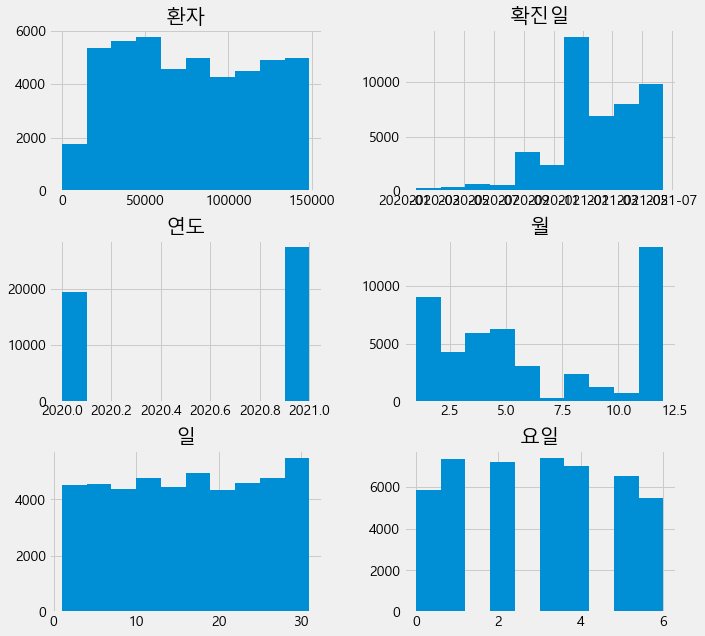

In [42]:
# df.hist로 히스토그램 그리기
k=df.hist(figsize=(10,10))

## value_counts로 하나의 변수에 대한 빈도수 구하기
### 연도

In [43]:
# "연도" 컬럼을 통해 빈도수 구하기
df["연도"].describe()

count    46732.000000
mean      2020.585038
std          0.492721
min       2020.000000
25%       2020.000000
50%       2021.000000
75%       2021.000000
max       2021.000000
Name: 연도, dtype: float64

In [44]:
# "연도" 컬럼의 비율 구하기
df["연도"].value_counts(normalize=True)*100

2021    58.503809
2020    41.496191
Name: 연도, dtype: float64

### 연도월

In [45]:
# 연도월에 대한 빈도수 구하기
# 빈도수를 구하고 sort_index 로 정렬합니다.
year_month=df["연도월"].value_counts().sort_index()
year_month

2020-1         7
2020-10      733
2020-11     2904
2020-12    10431
2020-2        80
2020-3       391
2020-4       156
2020-5       229
2020-6       459
2020-7       281
2020-8      2415
2020-9      1306
2021-1      4879
2021-2      4061
2021-3      3898
2021-4      5804
2021-5      6030
2021-6      2668
Name: 연도월, dtype: int64

<AxesSubplot:>

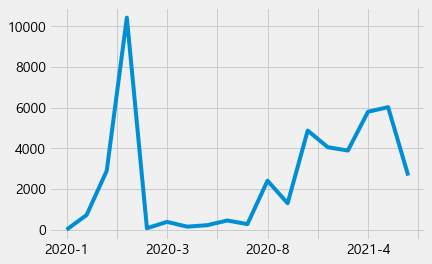

In [46]:
# 연도월을 시각화 합니다.
year_month.plot()

<AxesSubplot:>

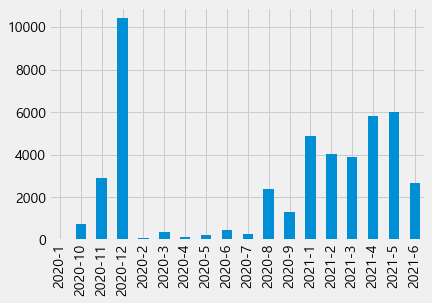

In [47]:
# 연도월을 막대 그래프로 시각화 합니다.
year_month.plot.bar()

### 요일별 빈도수 구하기

In [48]:
# 빈도수 구하고 인덱스 번호로 정렬합니다.
# weekday_count 변수에 담아 재사용합니다.
weekday_count=df["요일명"].value_counts().sort_index()
weekday_count

금    7011
목    7379
수    7177
월    5866
일    5453
토    6500
화    7346
Name: 요일명, dtype: int64

In [49]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# "월화수목금토일" 리스트로 만들어 weekday_list 변수로 재사용하기
weekday_list=[i for i in "월화수목금토일"]
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [50]:
# 인덱스 값을 요일명으로 변경하고 시각화 합니다.
weekday_count[weekday_list]

월    5866
화    7346
수    7177
목    7379
금    7011
토    6500
일    5453
Name: 요일명, dtype: int64

In [51]:
weekday_count=df["요일"].value_counts().sort_index()
weekday_count.index=weekday_list
weekday_count

월    5866
화    7346
수    7177
목    7379
금    7011
토    6500
일    5453
Name: 요일, dtype: int64

Text(0, 5866, '표시될값')

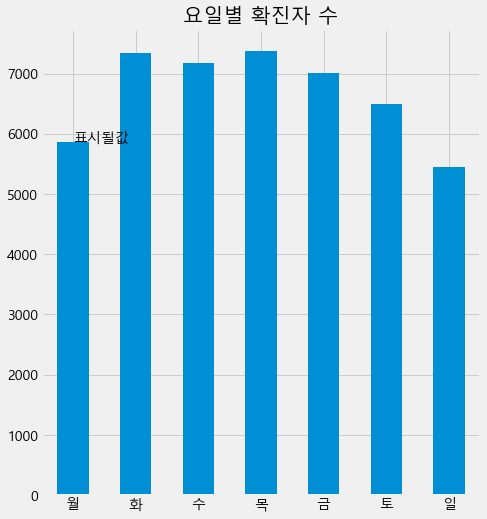

In [52]:
weekday_count.plot.bar(figsize=(7,8),rot=0, title="요일별 확진자 수").text(0,5866,"표시될값")


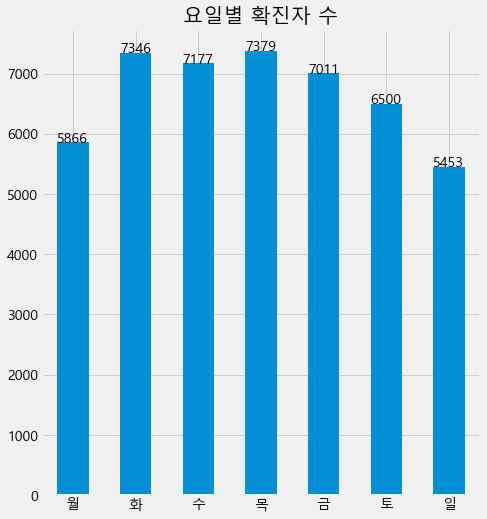

In [53]:
g=weekday_count.plot.bar(figsize=(7,8),rot=0, title="요일별 확진자 수")

for i, w in enumerate(weekday_count):
    g.text(i-0.25,w,w)

### 확진일 빈도수 구하기

In [54]:
# df["확진일"] 빈도수 구하고 인덱스 값인 날짜로 정렬하기
day_count=df["확진일"].value_counts().sort_index()
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-06-10    202
2021-06-11    208
2021-06-12    176
2021-06-13    122
2021-06-14    132
Name: 확진일, Length: 476, dtype: int64

<AxesSubplot:>

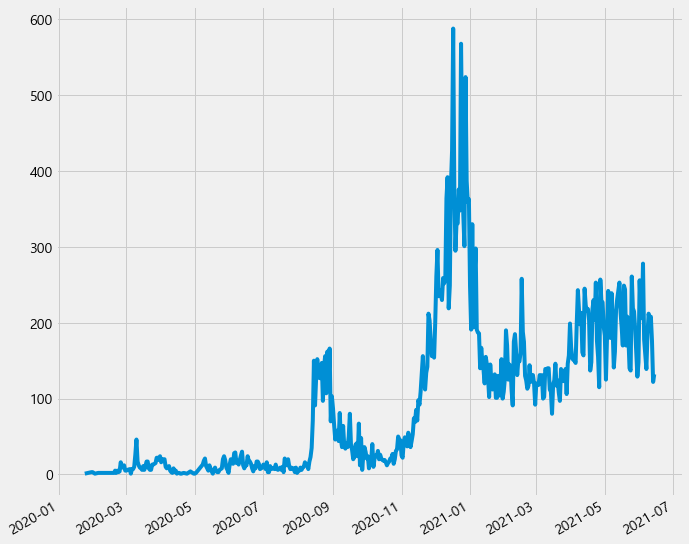

In [55]:
# 선 그래프로 시각화 하기
day_count.plot(figsize=(10,10))

## 전체 확진일 데이터 만들기
### head로 초기 데이터 보기

In [56]:
# head(10)로 10번째 확진 데이터를 봅니다.
df.head(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-6,월
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-6,월
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN,2021,6,14,0,2021-6,월
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-6,월
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN,2021,6,14,0,2021-6,월
46727,148582,2021-06-14,강동구,-,타시도 확진자 접촉,NaN,2021,6,14,0,2021-6,월
46726,148354,2021-06-14,성동구,-,기타 확진자 접촉,NaN,2021,6,14,0,2021-6,월
46725,148491,2021-06-14,광진구,-,기타 확진자 접촉,NaN,2021,6,14,0,2021-6,월
46724,148357,2021-06-14,양천구,-,중구 소재 직장 관련('21.6.),NaN,2021,6,14,0,2021-6,월


### iloc를 통해 첫 확진일과 마지막 확진일자 찾기

In [57]:
df.iloc[0]

환자                   148595
확진일     2021-06-14 00:00:00
거주지                     타시도
여행력                       -
접촉력                감염경로 조사중
퇴원현황                    NaN
연도                     2021
월                         6
일                        14
요일                        0
연도월                  2021-6
요일명                       월
Name: 46732, dtype: object

In [58]:
df.loc[46732]

환자                   148595
확진일     2021-06-14 00:00:00
거주지                     타시도
여행력                       -
접촉력                감염경로 조사중
퇴원현황                    NaN
연도                     2021
월                         6
일                        14
요일                        0
연도월                  2021-6
요일명                       월
Name: 46732, dtype: object

In [59]:
last_day=df.iloc[0,1]
last_day

Timestamp('2021-06-14 00:00:00')

In [60]:
first_day=df.iloc[-1,1]

In [61]:
first_day

Timestamp('2020-01-24 00:00:00')

### date_range로 전체 기간 데이터 만들기

In [62]:
# pd.date_range 로 전체 기간을 생성합니다.
all_day=pd.date_range(first_day,last_day)

In [63]:
# all_day 를 데이터프레임으로 변환합니다.
all_day=all_day.to_frame()
all_day

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
...,...
2021-06-10,2021-06-10
2021-06-11,2021-06-11
2021-06-12,2021-06-12
2021-06-13,2021-06-13


In [64]:
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-06-10    202
2021-06-11    208
2021-06-12    176
2021-06-13    122
2021-06-14    132
Name: 확진일, Length: 476, dtype: int64

In [65]:
# "확진수" 라는 컬럼을 생성해서 위에서 구한 day_count 를 추가합니다.
# 확진자가 없는 날도 인덱스에 생성이 됩니다.
all_day["확진수"]=day_count
all_day

,0,확진수
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,NaN
2020-01-26,2020-01-26,NaN
2020-01-27,2020-01-27,NaN
2020-01-28,2020-01-28,NaN
...,...,...
2021-06-10,2021-06-10,202.0
2021-06-11,2021-06-11,208.0
2021-06-12,2021-06-12,176.0
2021-06-13,2021-06-13,122.0


In [66]:
# 필요 없는 0 컬럼을 삭제합니다.
del all_day[0]

### 결측치 채우기

In [67]:
# 비어있는 값은 확진자가 없었던 날이기 때문에 fillna로 0으로 채웁니다.
all_day=all_day.fillna(0)

In [68]:
# day_count 에서 초기 30개의 데이터에 대해서 슬라이싱 해서 시각화 합니다.


### 누적 확진 수 구하기

In [69]:
# df

In [70]:
# cumsum 으로 "누적확진수" 구해서 새로운 변수에 담기
all_day["누적확진수"]=all_day["확진수"].cumsum()
#cumsum
all_day

,확진수,누적확진수
2020-01-24,1.0,1.0
2020-01-25,0.0,1.0
2020-01-26,0.0,1.0
2020-01-27,0.0,1.0
2020-01-28,0.0,1.0
...,...,...
2021-06-10,202.0,46094.0
2021-06-11,208.0,46302.0
2021-06-12,176.0,46478.0
2021-06-13,122.0,46600.0


<AxesSubplot:>

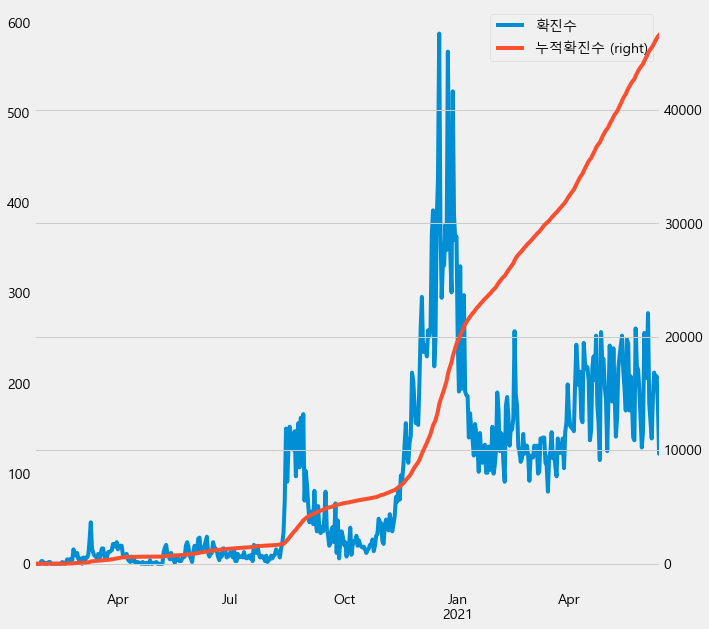

In [71]:
# 시각화 하기
all_day.plot(secondary_y="누적확진수",figsize=(10,10))
#pandas는 보통 인덱스값이 x축값
#seaborn x축과 y축 그려주고 싶을때

## 거주지

In [72]:
# 거주지 빈도수 구하기
df["거주지"].value_counts()

송파구     2824
강남구     2768
강서구     2255
타시도     2191
노원구     2157
관악구     2140
기타      2113
중랑구     2070
서초구     2011
은평구     2010
동작구     1943
성북구     1936
강동구     1886
동대문구    1732
영등포구    1727
양천구     1623
구로구     1546
광진구     1533
마포구     1485
도봉구     1439
강북구     1354
성동구     1277
용산구     1262
서대문구    1179
종로구      786
금천구      777
중구       708
Name: 거주지, dtype: int64

<AxesSubplot:>

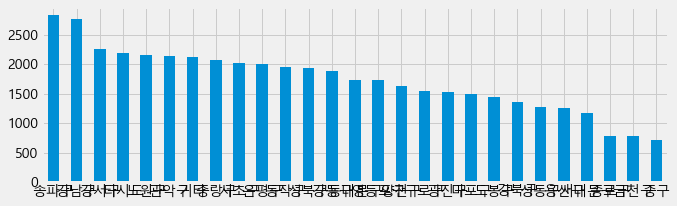

In [73]:
gu_count=df["거주지"].value_counts()
gu_count.plot.bar(rot=0,figsize=(10,3))

### 타시도, 기타 전처리

In [74]:
# "거주지" => "거주구"로 사본 생성
df["거주구"]=df[["거주지"]].copy()

In [75]:
# 텍스트 앞뒤 공백 제거하기
df["거주구"].str.strip()

연번
46732    타시도
46731    성동구
46730    중랑구
46729    강동구
46728    광진구
        ... 
5        성북구
4        마포구
3        종로구
2        중랑구
1        강서구
Name: 거주구, Length: 46732, dtype: object

In [76]:
df[["거주구"]]

,거주구
연번,
46732,타시도
46731,성동구
46730,중랑구
46729,강동구
46728,광진구
...,...
5,성북구
4,마포구
3,종로구


In [77]:
# 타시도 => 기타로 변경하기
df.loc[df["거주구"]=="타시도","거주구"]="기타"

In [78]:
# "거주구" 빈도수 구하기
df["거주구"].value_counts()

기타      4304
송파구     2824
강남구     2768
강서구     2255
노원구     2157
관악구     2140
중랑구     2070
서초구     2011
은평구     2010
동작구     1943
성북구     1936
강동구     1886
동대문구    1732
영등포구    1727
양천구     1623
구로구     1546
광진구     1533
마포구     1485
도봉구     1439
강북구     1354
성동구     1277
용산구     1262
서대문구    1179
종로구      786
금천구      777
중구       708
Name: 거주구, dtype: int64

<AxesSubplot:>

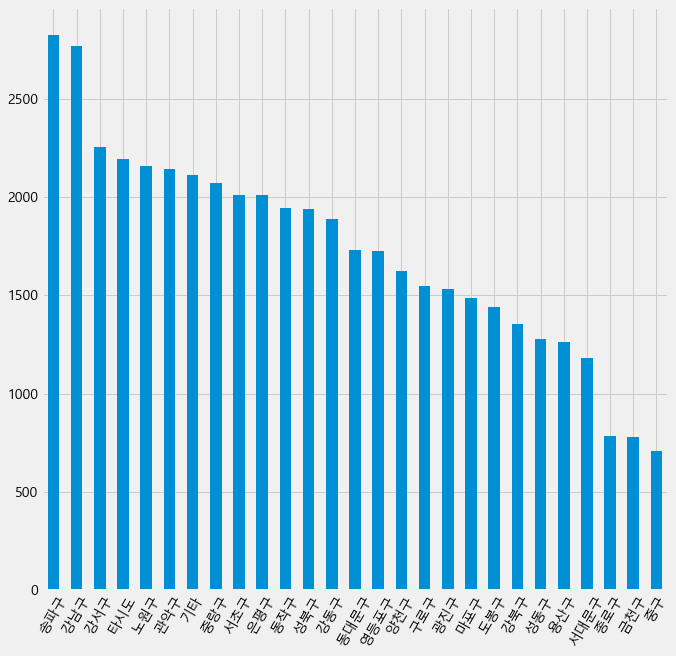

In [79]:
# gu_count 변수에 담긴 값 시각화 하기
gu_count.plot.bar(rot=60,figsize=(10,10))

## 두 개의 변수에 대한 빈도수 구하기
### 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기

In [80]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기
# 연도, 퇴원현황 빈도수 구하기
pd.crosstab(df["연도"],df["퇴원현황"])

퇴원현황,사망,퇴원
연도,,
2020,306,19058
2021,195,24559


In [81]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도 빈율 구하기
pd.crosstab(df["연도"],df["퇴원현황"],normalize=True)*100

퇴원현황,사망,퇴원
연도,,
2020,0.693594,43.197788
2021,0.441996,55.666621


### 연도, 월 두 개의 변수에 대한 빈도수 구하기

In [82]:
# pd..crosstab 으로 연도, 월 두 개의 변수에 대한 빈도수 구하기
ym=pd.crosstab(df["연도"],df["월"]).T
ym

연도,2020,2021
월,,
1,7,4879
2,80,4061
3,391,3898
4,156,5804
5,229,6030
6,459,2668
7,281,0
8,2415,0
9,1306,0


<AxesSubplot:xlabel='월'>

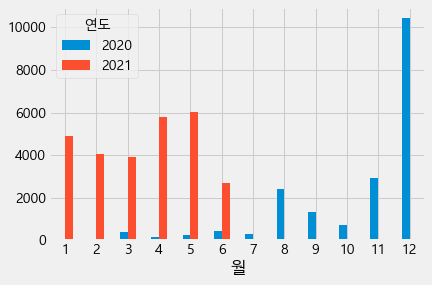

In [83]:
# 시각화 하기
ym.plot.bar(rot=0)

### 연도, 요일 두 개의 변수에 대한 빈도수 구하기

In [84]:
# pd.crosstab 으로 연도, 요일 두 개의 변수에 대한 빈도수 구하기


In [85]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# weekday_list


In [86]:
# 컬럼명 변경하기


### 거주구, 연도월에 대한 빈도수 구하기

In [87]:
# pd.crosstab 으로 두 개 변수에 대한 빈도수 구하기
# 거주구, 연도월에 대한 빈도수 구하기
p=pd.crosstab(df["거주구"],df["연도월"])
p.head()

연도월,2020-1,2020-10,2020-11,2020-12,2020-2,2020-3,2020-4,2020-5,2020-6,2020-7,2020-8,2020-9,2021-1,2021-2,2021-3,2021-4,2021-5,2021-6
거주구,,,,,,,,,,,,,,,,,,
강남구,0,87,156,422,7,34,23,11,8,15,88,84,226,118,240,428,529,292
강동구,0,19,74,303,4,6,3,11,11,14,94,42,180,161,252,253,314,145
강북구,0,15,41,245,0,5,0,9,10,4,85,31,174,124,125,133,266,87
강서구,1,22,305,729,1,20,4,19,33,25,117,65,213,96,133,217,189,66
관악구,0,86,74,473,4,30,9,16,58,27,106,135,163,182,129,313,226,109


In [88]:
# background_gradient() 로 빈도수 표현하기
p.style.background_gradient(cmap="Greys_r")

연도월,2020-1,2020-10,2020-11,2020-12,2020-2,2020-3,2020-4,2020-5,2020-6,2020-7,2020-8,2020-9,2021-1,2021-2,2021-3,2021-4,2021-5,2021-6
거주구,,,,,,,,,,,,,,,,,,
강남구,0,87,156,422,7,34,23,11,8,15,88,84,226,118,240,428,529,292
강동구,0,19,74,303,4,6,3,11,11,14,94,42,180,161,252,253,314,145
강북구,0,15,41,245,0,5,0,9,10,4,85,31,174,124,125,133,266,87
강서구,1,22,305,729,1,20,4,19,33,25,117,65,213,96,133,217,189,66
관악구,0,86,74,473,4,30,9,16,58,27,106,135,163,182,129,313,226,109
광진구,0,11,43,279,1,5,2,6,3,5,74,34,119,155,253,239,214,90
구로구,0,22,72,348,1,33,1,6,45,5,60,32,179,237,126,142,183,54
금천구,0,5,27,201,1,11,0,3,17,7,34,20,72,69,26,84,146,54
기타,0,82,204,1620,10,22,13,12,25,12,175,128,612,415,243,319,249,163


In [89]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

In [90]:
# gu_month.T 로 행과 열을 바꾼 뒤에 보기
p.T.style.background_gradient()


거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도월,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,1
2020-10,87,19,15,22,86,11,22,5,82,33,22,24,28,26,10,39,18,17,61,13,18,21,19,7,7,21
2020-11,156,74,41,305,74,43,72,27,204,144,91,127,126,103,123,239,82,114,210,120,95,83,92,31,43,85
2020-12,422,303,245,729,473,279,348,201,1620,335,250,330,420,404,253,353,230,348,508,413,391,191,425,278,174,508
2020-2,7,4,0,1,4,1,1,1,10,8,0,1,1,0,4,4,3,1,12,1,1,0,7,8,0,0
2020-3,34,6,5,20,30,5,33,11,22,12,6,25,23,16,9,21,3,13,15,17,18,12,14,4,5,12
2020-4,23,3,0,4,9,2,1,0,13,3,3,5,7,7,6,13,13,9,10,3,4,6,7,1,1,3
2020-5,11,11,9,19,16,6,6,3,12,8,10,3,9,3,8,4,21,5,11,7,11,20,7,3,3,3
2020-6,8,11,10,33,58,3,45,17,25,13,43,4,13,12,8,15,9,4,7,42,29,12,18,3,3,14


In [91]:
# gu_month 에서 ["강남구", "서초구", "송파구"] 만 가져오기
p.loc[["강남구", "서초구", "송파구"]]

연도월,2020-1,2020-10,2020-11,2020-12,2020-2,2020-3,2020-4,2020-5,2020-6,2020-7,2020-8,2020-9,2021-1,2021-2,2021-3,2021-4,2021-5,2021-6
거주구,,,,,,,,,,,,,,,,,,
강남구,0,87,156,422,7,34,23,11,8,15,88,84,226,118,240,428,529,292
서초구,0,39,239,353,4,21,13,4,15,7,79,52,143,108,162,360,265,147
송파구,0,61,210,508,12,15,10,11,7,44,161,79,242,209,208,382,440,225


In [92]:
# gu_month 에서 ["2021-04", "2021-05"] 만 가져오기
p[["2021-4", "2021-5"]]

연도월,2021-4,2021-5
거주구,,
강남구,428,529
강동구,253,314
강북구,133,266
강서구,217,189
관악구,313,226
광진구,239,214
구로구,142,183
금천구,84,146
기타,319,249


In [93]:
# gu_month 에서 ["강남구", "서초구", "송파구"]와 ["2021-04", "2021-05"] 만 가져오기
# .loc[행, 열]
p.loc[["강남구", "서초구", "송파구"],["2021-4", "2021-5"]].style.background_gradient()

연도월,2021-4,2021-5
거주구,,
강남구,428,529
서초구,360,265
송파구,382,440


## Boolean Indexing 으로 특정 조건 값 찾기
### 여러 조건 비교하기

In [94]:
# 강남구에서 "일요일"에 확진된 데이터만 찾기
# .loc[행]
# .loc[행, 열]
# .loc[조건, 열]
df.loc[(df["거주구"]=="강남구")& (df["요일명"]=="일")]
df.loc[(df["거주구"]=="강남구")&(df["요일명"]=="일"),"접촉력"]

연번
46594     감염경로 조사중
46581    기타 확진자 접촉
46580     감염경로 조사중
46568     감염경로 조사중
46542     감염경로 조사중
           ...    
430       감염경로 조사중
429           해외유입
428           해외유입
126          EZHLD
90        감염경로 조사중
Name: 접촉력, Length: 308, dtype: object

In [95]:
# 거주구가 강남구이며, 여행력이 일본인 데이터 찾기
df[(df["거주구"]=="강남구") & (df["여행력"].str.contains("일본"))]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
31136,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-3,수,강남구
12540,44037,2020-12-14,강남구,일본,해외유입,퇴원,2020,12,14,0,2020-12,월,강남구


### str.contains 활용하기

In [96]:
# 접촉력의 영문자 검색을 위해 영문자를 모두 대문자로 만들고 "접촉력_대문자"컬럼을 생성하기
df["접촉력 대문자"]=df["접촉력"].str.upper()
df[["접촉력 대문자"]]

,접촉력 대문자
연번,
46732,감염경로 조사중
46731,감염경로 조사중
46730,감염경로 조사중
46729,감염경로 조사중
46728,감염경로 조사중
...,...
5,기타 확진자 접촉
4,해외유입
3,종로구 집단발병


In [97]:
# "접촉력_대문자" 컬럼으로 PC방 데이터를 찾고 접촉력 컬럼에 대해서만 빈도수 구하기
df.loc[df["접촉력 대문자"].str.contains("PC"),"접촉력"].value_counts()

강북구 소재 PC방 관련    35
강남구 소재 PC방 관련    32
강북구 소재 pc방 관련    23
동대문관련(교회pc방)     20
성동구 소재 PC방 관련    10
금천구 소재 PC방 관련     9
Name: 접촉력, dtype: int64

In [98]:
# str.contains로 여행력이 영국,프랑스,독일,스페인 인 데이터 찾기
df.loc[df["여행력"].str.contains("영국|프랑스|독일|스페인")]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력 대문자
연번,,,,,,,,,,,,,,
45325,144502,2021-06-06,양천구,영국,해외유입,퇴원,2021,6,6,6,2021-6,일,양천구,해외유입
44571,142272,2021-06-03,용산구,독일,기타 확진자 접촉,퇴원,2021,6,3,3,2021-6,목,용산구,기타 확진자 접촉
41854,133614,2021-05-19,동대문구,프랑스,해외유입,퇴원,2021,5,19,2,2021-5,수,동대문구,해외유입
41030,131613,2021-05-15,은평구,독일,해외유입,퇴원,2021,5,15,5,2021-5,토,은평구,해외유입
38740,124815,2021-05-04,기타,독일,해외유입,퇴원,2021,5,4,1,2021-5,화,기타,해외유입
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,8044,2020-03-13,마포구,프랑스,해외유입,퇴원,2020,3,13,4,2020-3,금,마포구,해외유입
236,8053,2020-03-13,노원구,영국,해외유입,퇴원,2020,3,13,4,2020-3,금,노원구,해외유입
230,7923,2020-03-12,관악구,스페인,해외유입,퇴원,2020,3,12,3,2020-3,목,관악구,해외유입


### isin 으로 여러 값 찾기

In [99]:
# isin 을 사용해 리스트로 여러 값을 찾아오기
# "거주구"가 "강남구", "서초구", "송파구" 인 데이터만 찾기
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기
df.loc[df["거주구"].isin(["강남구", "서초구", "송파구"]),"접촉력"]

연번
46719                병원 및 요양시설
46717                기타 확진자 접촉
46713    동대문구 소재 직장 관련('21.6.)
46712                 감염경로 조사중
46708                기타 확진자 접촉
                 ...          
31                  타시도 확진자 접촉
30                  타시도 확진자 접촉
26                  타시도 확진자 접촉
23                  타시도 확진자 접촉
9                         해외유입
Name: 접촉력, Length: 7603, dtype: object

## 여행력

In [100]:
#  접촉력이 해외유입인 데이터에 대해 "해외유입" 변수 만들기
df["해외유입"]=df["접촉력"].str.contains("해외유입")
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력 대문자,해외유입
연번,,,,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-6,월,기타,감염경로 조사중,False
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-6,월,성동구,감염경로 조사중,False
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN,2021,6,14,0,2021-6,월,중랑구,감염경로 조사중,False
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-6,월,강동구,감염경로 조사중,False
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN,2021,6,14,0,2021-6,월,광진구,감염경로 조사중,False


In [112]:
# 거주구, 해외유입 빈도수 구하기
pd.crosstab(df["거주구"],df["해외유입"])

해외유입,False,True
거주구,,
강남구,2674,94
강동구,1836,50
강북구,1337,17
강서구,2214,41
관악구,2109,31
광진구,1515,18
구로구,1532,14
금천구,771,6
기타,4105,199


In [115]:
# 거주구 해외유입 비율 구하기
q=pd.crosstab(df["거주구"],df["해외유입"],normalize=True)*100

<AxesSubplot:ylabel='거주구'>

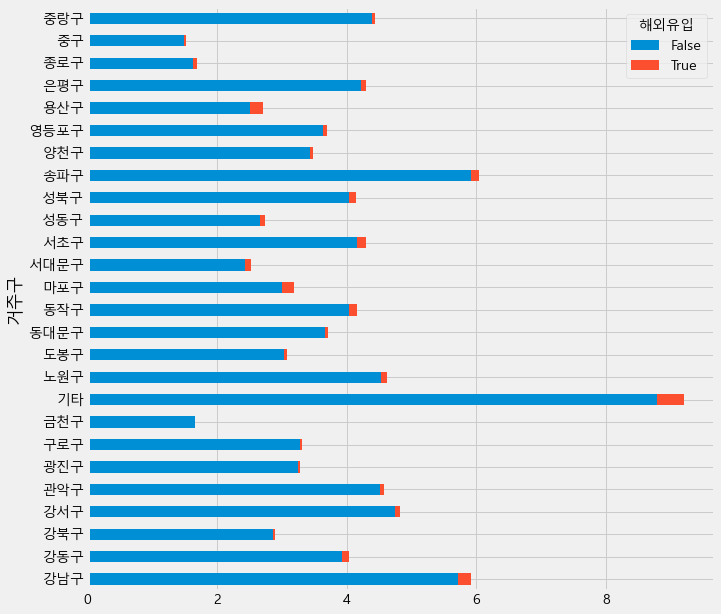

In [119]:
# 해외유입 여부에 따라 막대그래프를 그립니다.
# stacked=True 로 두 가지를 함께 그립니다.
q.plot.barh(stacked=True,figsize=(10,10))

## pivot_table 사용하기

In [123]:
# 거주구별 해외유입 여부에 따른 빈도수 구하기
gu_over_count=df.pivot_table(index="거주구",columns="해외유입",values="환자",aggfunc="count")
gu_over_count

해외유입,False,True
거주구,,
강남구,2674,94
강동구,1836,50
강북구,1337,17
강서구,2214,41
관악구,2109,31
광진구,1515,18
구로구,1532,14
금천구,771,6
기타,4105,199


In [105]:
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [129]:
# 거주구에 따른 요일별 확진자 빈도수
gu_week=df.pivot_table(index="거주구",columns="요일명",values="환자",aggfunc="count")
gu_week.columns=weekday_list
gu_week

,월,화,수,목,금,토,일
거주구,,,,,,,
강남구,435,367,464,363,308,393,438
강동구,273,286,299,247,243,263,275
강북구,186,208,205,219,163,159,214
강서구,402,353,362,275,233,316,314
관악구,300,339,323,257,250,300,371
광진구,240,232,237,183,198,191,252
구로구,221,247,235,228,158,230,227
금천구,100,122,112,84,105,116,138
기타,526,1015,625,614,434,521,569


## groupby 사용하기

In [139]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하기
gu_over=df.groupby(["거주구","해외유입"])["환자"].count()
gu_over.head()

거주구  해외유입 
강남구  False    2674
     True       94
강동구  False    1836
     True       50
강북구  False    1337
Name: 환자, dtype: int64

### Groupby의 unstack()
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png" width="600">

In [140]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하고
# 마지막 인덱스를 컬럼으로 만들기
gu_over.unstack()

해외유입,False,True
거주구,,
강남구,2674,94
강동구,1836,50
강북구,1337,17
강서구,2214,41
관악구,2109,31
광진구,1515,18
구로구,1532,14
금천구,771,6
기타,4105,199
